In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to work with feather file we are installing pyarrow
!pip install pyarrow

In [3]:
data= pd.read_feather(r'C:\Users\somde\Downloads\Sales_data.ftr')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data=data.drop_duplicates()

In [5]:
data=data.dropna()
data.shape

(185687, 6)

month wise sale analysis
(best month of sale)

In [6]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
data['Order Date'][0]

'04/19/19 08:46'

In [8]:
data['Order Date'][0].split('/')[0]

'04'

In [9]:
def order_month(x):
    return x.split('/')[0]

In [10]:
data['order_month']= data['Order Date'].apply(order_month)

In [11]:
data['order_month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [12]:
filter1= data['order_month']== 'Order Date'
data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [13]:
data= data[~filter1]

In [14]:
data['order_month']=data['order_month'].astype(int)

In [15]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
data['Quantity Ordered']=data['Quantity Ordered'].astype(int)
data['Price Each']=data['Price Each'].astype(float)

In [18]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
order_month           int32
dtype: object

In [19]:
data['sale_rate']= data['Quantity Ordered']* data['Price Each']

In [20]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [21]:
data.groupby(['order_month'])['sale_rate'].sum()

order_month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sale_rate, dtype: float64

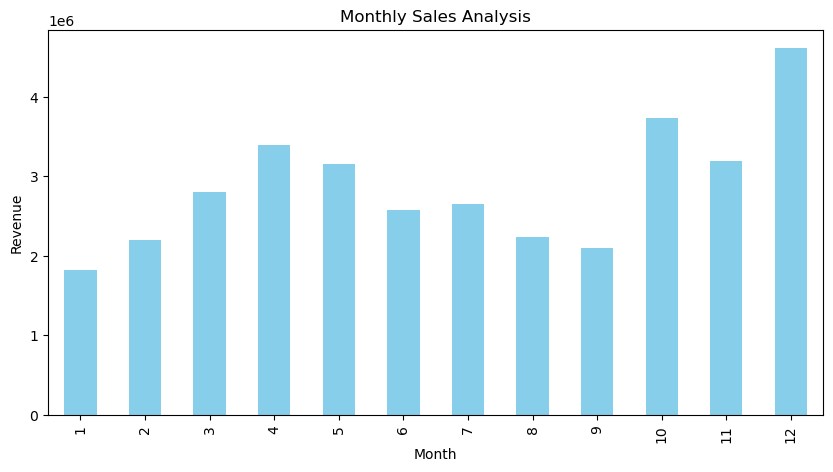

In [62]:
monthly_sales = data.groupby('order_month')['sale_rate'].sum()
monthly_sales.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Analysis")
plt.show()

### From the above monthwise-sale analysis , we can see december has the best month of sale.

## CITY-WISE ORDER ANALYSIS (CITY WITH MAXIMUM ORDER)

In [24]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
data['city']= data['Purchase Address'].str.split(',').str.get(1)
data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [26]:
pd.value_counts(data['city'])

city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

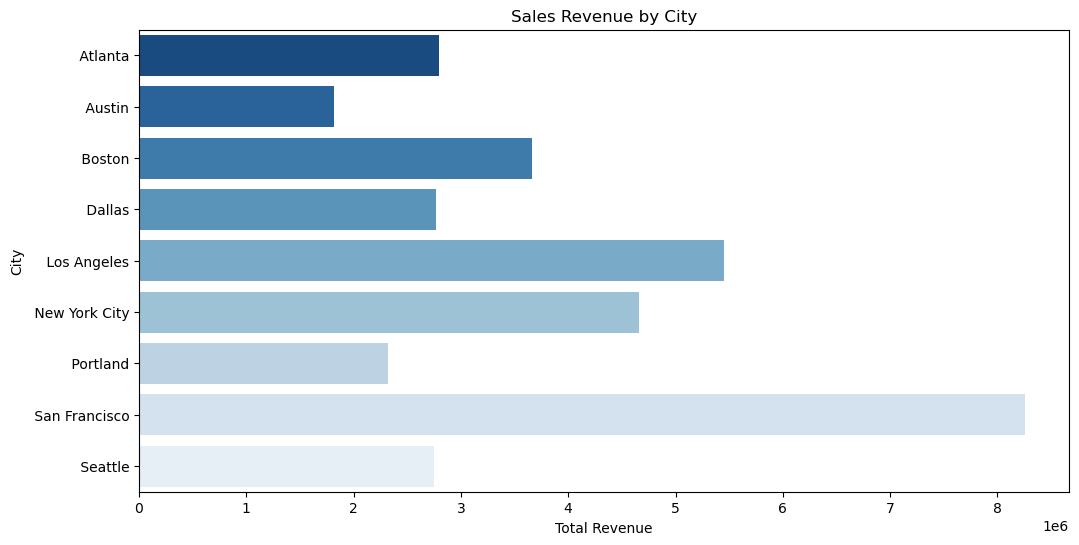

In [63]:
# Now, perform the grouping
city_sales = data.groupby('City')['sale_rate'].sum().reset_index()

# Visualizing the revenue by city
plt.figure(figsize=(12,6))
sns.barplot(x=city_sales['sale_rate'], y=city_sales['City'], palette="Blues_r")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.title("Sales Revenue by City")
plt.show()

### SAN FRANSICO has the maximum percentage of orders

###

## PRODUCT SOLD THE MOST AND REASON

In [28]:
data['Product']

0               USB-C Charging Cable
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
5                   Wired Headphones
                     ...            
186845        AAA Batteries (4-pack)
186846                        iPhone
186847                        iPhone
186848        34in Ultrawide Monitor
186849          USB-C Charging Cable
Name: Product, Length: 185686, dtype: object

In [29]:
a_df=data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

In [30]:
a_df=a_df.reset_index()
a_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [31]:
products= a_df['Product'].values

Text(0, 0.5, 'Avg price of product')

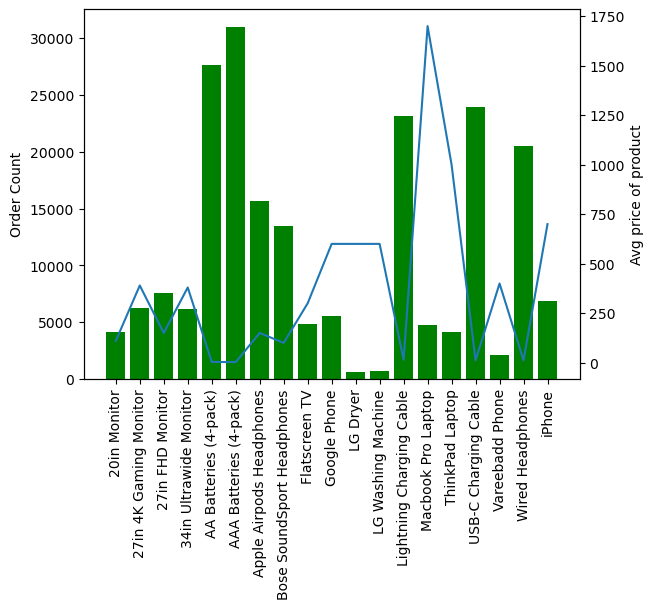

In [32]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(a_df['Product'],a_df['Quantity Ordered'], color='g')
ax2.plot(a_df['Product'], a_df['Price Each'])
ax1.set_xticklabels(products, rotation= 'vertical')
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

### top selling product is AAA batteries. From the analysis if product is cheaper the quantinty order is higher

###

## Understanding Trend of the most sold product

In [34]:
data['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [35]:
data['Product'].value_counts()[0:5].index
most_sold_products= data['Product'].value_counts()[0:5].index
most_sold_products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [36]:
data['Product'].isin(most_sold_products)
data[data['Product'].isin(most_sold_products)]
most_sold_df= data[data['Product'].isin(most_sold_products)]
most_sold_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [37]:
most_sold_df.groupby(['order_month','Product']).size()

order_month  Product                 
1            AA Batteries (4-pack)       1037
             AAA Batteries (4-pack)      1084
             Lightning Charging Cable    1069
             USB-C Charging Cable        1171
             Wired Headphones            1004
2            AA Batteries (4-pack)       1274
             AAA Batteries (4-pack)      1320
             Lightning Charging Cable    1393
             USB-C Charging Cable        1511
             Wired Headphones            1179
3            AA Batteries (4-pack)       1672
             AAA Batteries (4-pack)      1645
             Lightning Charging Cable    1749
             USB-C Charging Cable        1766
             Wired Headphones            1512
4            AA Batteries (4-pack)       2062
             AAA Batteries (4-pack)      1988
             Lightning Charging Cable    2197
             USB-C Charging Cable        2074
             Wired Headphones            1888
5            AA Batteries (4-pack)       1

In [38]:
pivot_table=most_sold_df.groupby(['order_month','Product']).size().unstack()  # .unstack makes the stacked column with multi_index pivoted table. i.i. it changes the common column into toprow. see eg.
pivot_table

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
order_month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='order_month'>

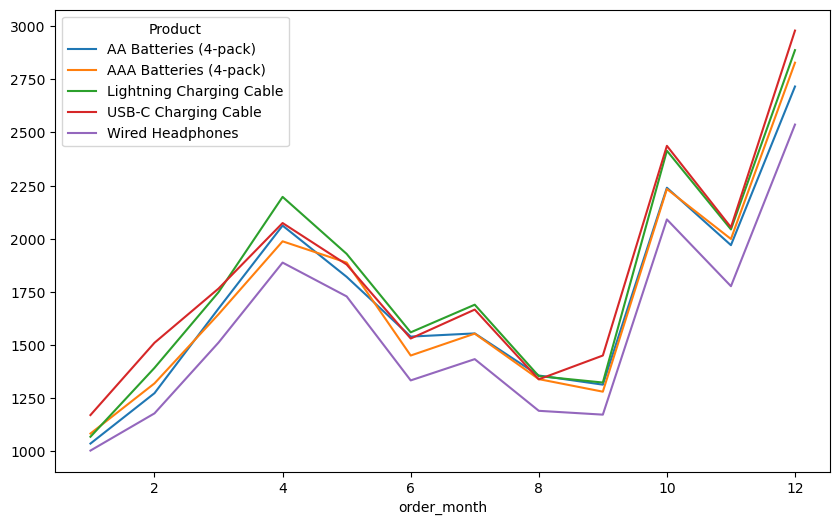

In [39]:
pivot_table.plot(figsize=(10,6))

### we can see the rise of sale of top selling products during october and december ( maybe due to festivalsale)

###

## PRODUCTS WHICH ARE MOST OFTEN SOLD TOGETHER

In [41]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [42]:
dup=data[data['Order ID'].duplicated(keep=False)]
dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [43]:
dup.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x))

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 6879, dtype: object

In [44]:
dup.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [45]:
dup_df=dup.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'grouped products'})
dup_df

,Order ID,grouped products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [46]:
final=dup.merge(dup_df, how='left', on='Order ID')
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate,city,grouped products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [47]:
final1=final.drop_duplicates(subset= 'Order ID')
final1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,sale_rate,city,grouped products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


In [48]:
final1['grouped products'].value_counts()[0:5]

grouped products
iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: count, dtype: int64

<Axes: ylabel='count'>

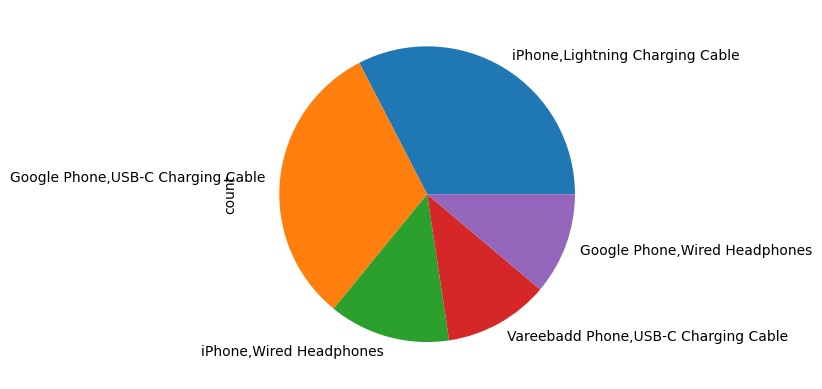

In [49]:
final1['grouped products'].value_counts()[0:5].plot.pie()

### this can be used for recommendation scenario. If a person buys Iphone we can recommened charging cable,wired headphones as "also bought together" 